In [3]:
import pandas as pd

import matplotlib.pyplot as plt

In [4]:

# the full data 20ML file's     URL https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/refs/heads/main/ratings.csv
# the 1000 sample data file's   URL https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/main/ratings_Electronics%20(1000%20sample).csv
url = "https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/refs/heads/main/ratings.csv"
df = pd.read_csv(url)

print(df.head(10))


   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580
5       1      112     3.5  1094785740
6       1      151     4.0  1094785734
7       1      223     4.0  1112485573
8       1      253     4.0  1112484940
9       1      260     4.0  1112484826


# Youssef **Ekrami**

### 1.Prepare a dataset of at least 100,000 users, > 1000 products, and > 1 million ratings.

In [5]:
# 1. Print the number of users
num_users = df['userId'].nunique()
print("Number of users:", num_users)

# 2. Print the number of items
num_items = df['movieId'].nunique()
print("Number of items:", num_items)

# 2. Print the number of ratings
num_ratings = len(df)
print("Number of ratings:", num_ratings)

Number of users: 7120
Number of items: 14026
Number of ratings: 1048575


### 3. Calculate the number of ratings for each user (nu) and save it


In [6]:
nu = df.groupby('userId').size()
print("\nNumber of ratings per user (nu):")
print(nu.head())


Number of ratings per user (nu):
userId
1    175
2     61
3    187
4     28
5     66
dtype: int64


### 4. Calculate the number of ratings for each item (ni) and save it


In [7]:
ni = df.groupby('movieId').size()
print("\nNumber of ratings per item (ni):")
print(ni.head())



Number of ratings per item (ni):
movieId
1    2569
2    1155
3     685
4     138
5     657
dtype: int64


### 5. Compute the average ratings per user (ru) and save it


In [8]:

average_ru = df.groupby('userId')['rating'].mean()
print("\nAverage ratings per user (ru):")
print(average_ru.head(100))



Average ratings per user (ru):
userId
1      3.742857
2      4.000000
3      4.122995
4      3.571429
5      4.272727
         ...   
96     3.453229
97     3.487179
98     4.187500
99     4.160714
100    3.500000
Name: rating, Length: 100, dtype: float64


### 6. Compute the average ratings per item (ri) and save it


In [9]:

average_ri = df.groupby('movieId')['rating'].mean()
print("\nAverage ratings per item (ri):")
print(average_ri.head(10))


Average ratings per item (ri):
movieId
1     3.959323
2     3.268398
3     3.186861
4     3.000000
5     3.143836
6     3.836508
7     3.381429
8     3.352564
9     3.017327
10    3.427003
Name: rating, dtype: float64


Ratings per item sorted ascendingly:
movieId
130642    1
85312     1
85307     1
85305     1
5547      1
         ..
90863     1
5978      1
90853     1
90769     1
5973      1
Length: 700, dtype: int64


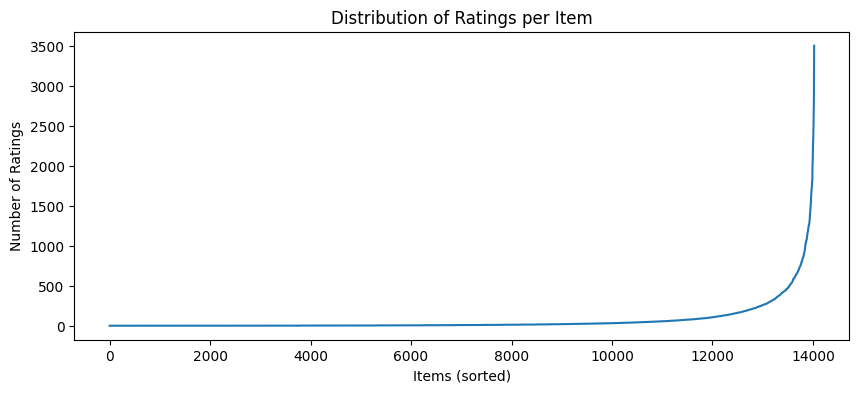

In [10]:
### 7. Ascendingly order the total number of ratings per item and plot the distribution per item

# Total number of ratings per item (ni already computed previously)
ni_sorted = ni.sort_values(ascending=True)
print("Ratings per item sorted ascendingly:")
print(ni_sorted.head(700))

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(ni_sorted.values)
plt.title("Distribution of Ratings per Item")
plt.xlabel("Items (sorted)")
plt.ylabel("Number of Ratings")
plt.show()


### 8. Compute number of products based on their average ratings (percentage groups)


In [11]:

# Convert average item ratings to percentage
average_ri_percent = (average_ri / 5) * 100

# Define bins according to your specification
bins = [0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 100]

# Define group labels
labels = ["G1 (<=1%)","G2 (1%-5%)","G3 (5%-10%)","G4 (10%-20%)",
          "G5 (20%-30%)","G6 (30%-40%)","G7 (40%-50%)","G8 (50%-60%)",
          "G9 (60%-70%)","G10 (70%-100%)"]

# Categorize each product into a group
groups = pd.cut(average_ri_percent, bins=bins, labels=labels, include_lowest=True)

# Count items per group
group_counts = groups.value_counts().sort_index()
print("\nNumber of products in each rating group:")
print(group_counts)



Number of products in each rating group:
rating
G1 (<=1%)            0
G2 (1%-5%)           0
G3 (5%-10%)        183
G4 (10%-20%)       195
G5 (20%-30%)       260
G6 (30%-40%)       605
G7 (40%-50%)      1166
G8 (50%-60%)      2481
G9 (60%-70%)      3889
G10 (70%-100%)    5247
Name: count, dtype: int64


### 9. Compute the total number of ratings in each group and order them ascendingly


In [12]:
# First, make sure we are using the correct column: productId
ni = df.groupby('movieId').size()  # number of ratings per product
average_ri = df.groupby('movieId')['rating'].mean()

# Convert average rating to percentage of max (5 stars)
average_ri_percent = (average_ri / 5) * 100

# Define the bins and labels again (same as your point 8)
bins = [0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 100]
labels = ["G1 (<=1%)","G2 (1%-5%)","G3 (5%-10%)","G4 (10%-20%)",
          "G5 (20%-30%)","G6 (30%-40%)","G7 (40%-50%)","G8 (50%-60%)",
          "G9 (60%-70%)","G10 (70%-100%)"]

# Assign each product to a group
groups = pd.cut(average_ri_percent, bins=bins, labels=labels, include_lowest=True)

# Create a DataFrame with productId, ni (count), and group
product_stats = pd.DataFrame({
    'ni': ni,
    'group': groups
})

# Compute total number of ratings in each group
ratings_per_group = product_stats.groupby('group')['ni'].sum()

# 9. Order ascendingly
ratings_per_group_sorted = ratings_per_group.sort_values(ascending=True)

print("\n9. Total number of ratings in each group (ascending order):")
print(ratings_per_group_sorted)


9. Total number of ratings in each group (ascending order):
group
G1 (<=1%)              0
G2 (1%-5%)             0
G3 (5%-10%)          201
G4 (10%-20%)         404
G5 (20%-30%)        1146
G6 (30%-40%)        7503
G7 (40%-50%)       27018
G8 (50%-60%)      113465
G9 (60%-70%)      288038
G10 (70%-100%)    610800
Name: ni, dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_18068\3651020785.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratings_per_group = product_stats.groupby('group')['ni'].sum()


### 10. Plot the distribution before and after ordering


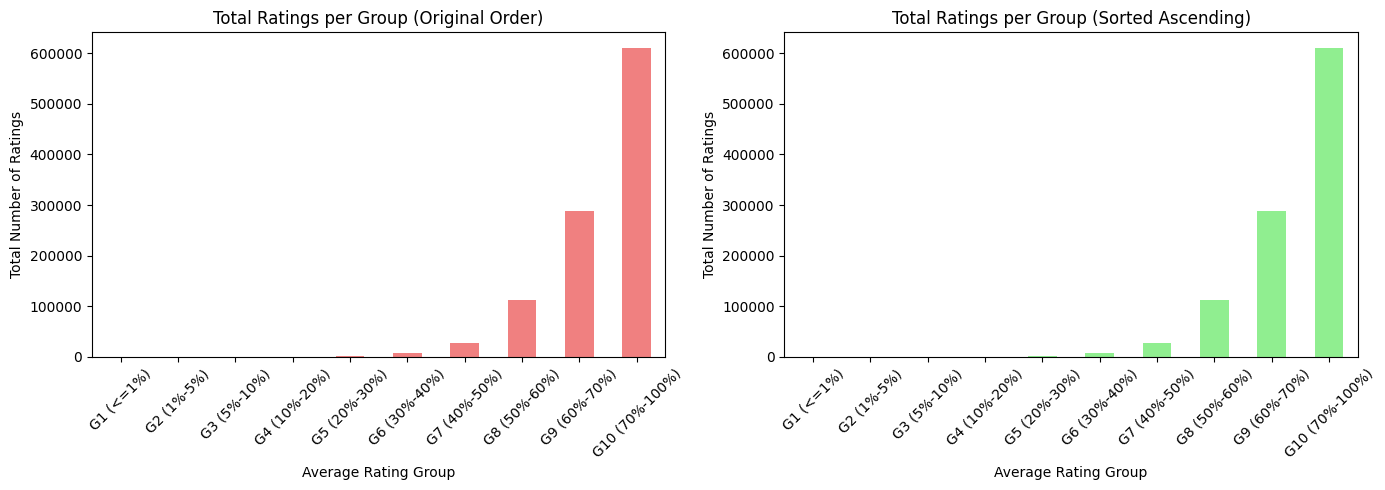

In [13]:

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
ratings_per_group.reindex(labels).plot(kind='bar', color='lightcoral')  # keeps original group order
plt.title("Total Ratings per Group (Original Order)")
plt.xlabel("Average Rating Group")
plt.ylabel("Total Number of Ratings")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
ratings_per_group_sorted.plot(kind='bar', color='lightgreen')
plt.title("Total Ratings per Group (Sorted Ascending)")
plt.xlabel("Average Rating Group")
plt.ylabel("Total Number of Ratings")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 11. Select three target users based on their rating percentage


In [14]:

total_movies = df['movieId'].nunique()
user_rating_counts = df.groupby('userId').size()
user_percentage = (user_rating_counts / total_movies) * 100

# Find users in each required band
U1_cands = user_percentage[user_percentage <= 2]
U2_cands = user_percentage[(user_percentage > 2) & (user_percentage <= 5)]
U3_cands = user_percentage[(user_percentage > 5) & (user_percentage <= 10)]

# Pick one user from each (first one found)
U1 = U1_cands.index[0]
U2 = U2_cands.index[0] if len(U2_cands) > 0 else U1_cands.index[-1]  # fallback just in case
U3 = U3_cands.index[0] if len(U3_cands) > 0 else U2_cands.index[-1]

print("\n11. Selected Target Users:")
print(f"U1 (≤2% of movies rated)    → {U1} | rated {user_rating_counts[U1]} movies ({user_percentage[U1]:.4f}%)")
print(f"U2 (>2% ≤5%)                → {U2} | rated {user_rating_counts[U2]} movies ({user_percentage[U2]:.4f}%)")
print(f"U3 (>5% ≤10%)               → {U3} | rated {user_rating_counts[U3]} movies ({user_percentage[U3]:.4f}%)")

# Save for later use
target_users = [U1, U2, U3]
print("\nTarget users saved → you can now use them for recommendation experiments!")


11. Selected Target Users:
U1 (≤2% of movies rated)    → 1 | rated 175 movies (1.2477%)
U2 (>2% ≤5%)                → 11 | rated 504 movies (3.5933%)
U3 (>5% ≤10%)               → 54 | rated 710 movies (5.0620%)

Target users saved → you can now use them for recommendation experiments!


# Dareen Musa

# Seif Samer